# 課題 ボストン住宅価格 線形回帰

# 線形回帰とは何か
以下の観点をすべて含めて記述しましょう。

1. 線形回帰とは何か。
2. 具体的に言うと？
3. 分類と何か違うのか。

__回答：__

1. 線形回帰とは、あるデータの集合から得た複数のプロット（変数）の関係を定式化すること。y=ax+b （xが独立変数、yが従属変数）など、最適な偏回帰係数（aやb）を求める。
2. 最小二乗法。
3. 分類は与えられるカテゴリに分けること。回帰はデータの予測を行うこと。


# データを取得する

__回答：__

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
%matplotlib inline

# 取得データをDataFrameにする

In [17]:
#X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
#y=boston.target[:100]
# 独立変数X
X=pd.DataFrame(boston.data[:,:], columns=boston.feature_names)
# 従属変数y, XXX.targetが判定結果
Y=pd.DataFrame(boston.target[:])

### チェック
* * * 

In [18]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
X['LSTAT'].isnull().any()

False

In [20]:
Y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


* * * 

# 説明変数を’LSTAT’のみにする

In [21]:
x = X['LSTAT'].values
# X['LSTAT']はSeries
# .valuesでnumpyへ

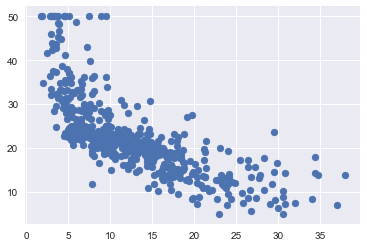

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(X['LSTAT'],Y) #同じ
##plt.scatter(x,np.array(y)) #同じ
#plt.scatter(x,y) #同じ
#plt.scatter(X['LSTAT'],y) #同じ
#plt.scatter(X,y) #Fail:全カラムを使って散布図書けない。

In [8]:
x.shape

(506,)

In [10]:
x

array([  4.98,   9.14,   4.03,   2.94,   5.33,   5.21,  12.43,  19.15,
        29.93,  17.1 ,  20.45,  13.27,  15.71,   8.26,  10.26,   8.47,
         6.58,  14.67,  11.69,  11.28,  21.02,  13.83,  18.72,  19.88,
        16.3 ,  16.51,  14.81,  17.28,  12.8 ,  11.98,  22.6 ,  13.04,
        27.71,  18.35,  20.34,   9.68,  11.41,   8.77,  10.13,   4.32,
         1.98,   4.84,   5.81,   7.44,   9.55,  10.21,  14.15,  18.8 ,
        30.81,  16.2 ,  13.45,   9.43,   5.28,   8.43,  14.8 ,   4.81,
         5.77,   3.95,   6.86,   9.22,  13.15,  14.44,   6.73,   9.5 ,
         8.05,   4.67,  10.24,   8.1 ,  13.09,   8.79,   6.72,   9.88,
         5.52,   7.54,   6.78,   8.94,  11.97,  10.27,  12.34,   9.1 ,
         5.29,   7.22,   6.72,   7.51,   9.62,   6.53,  12.86,   8.44,
         5.5 ,   5.7 ,   8.81,   8.2 ,   8.16,   6.21,  10.59,   6.65,
        11.34,   4.21,   3.57,   6.19,   9.42,   7.67,  10.63,  13.44,
        12.33,  16.47,  18.66,  14.09,  12.27,  15.55,  13.  ,  10.16,
      

In [23]:
Y.shape

(506, 1)

In [12]:
Y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


# 単回帰と重回帰についての違いを記述せよ

__回答：__
- 単回帰はxとしてひとつの特徴量のみを扱う回帰。
    - 例）身長と体重の関係。x:身長,y:体重
- 重回帰は複数のxとして、複数の特徴料を扱う回帰。
    - 例）新幹線の利用者。x1:GDP成長率、x2：高速道路の通行料、x3：航空運賃,y:新幹線の利用者数

# テストデータに分割する

<font color="red">__※X and y??__</font>

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### ※データの形状を確認する
* * *

In [25]:
X_test.shape

(102, 13)

In [27]:
X_train.shape

(404, 13)

In [30]:
y_test.shape

(102, 1)

In [31]:
y_test # Seriesは行列？

,0
329,22.6
371,50.0
219,23.0
403,8.3
78,21.2
15,19.9
487,20.6
340,18.7
310,16.1
102,18.6


In [33]:
type(y_test)

pandas.core.frame.DataFrame

In [35]:
y_test.ndim

2

In [37]:
y_train.shape

(404, 1)

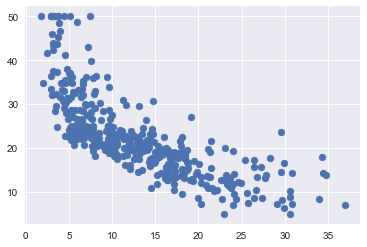

In [38]:
plt.scatter(X_train['LSTAT'],y_train)
# 母集団の似た散布図

* * *

# 学習
<font color="red">__※やり方がただしいか？ fitの引数はDF?またはnumpy?__</font>

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
lin_1d = LinearRegression()

In [42]:
X_train.shape

(404, 13)

In [41]:
y_train.shape

(404, 1)

In [44]:
#x = X_train["LSTAT"].values
x = X_train.loc[:, ['LSTAT']].as_matrix() #でもOK
#lin_1d.fit(x[:,np.newaxis], Y_train) #OK
lin_1d.fit(x, y_train) #OK
#lin_1d.fit(x[:,np.newaxis], np.array(Y_train)) #OK

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print(type(x))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [47]:
lin_1d.predict(35)

array([[ 1.28812629]])

<font color="red">※2乗誤差正しい？</font>

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, lin_1d.predict(x))

36.523966406959666

# 決定係数

In [51]:
x_test = X_test['LSTAT'].values[:,np.newaxis]
score_1d = lin_1d.score(x_test, y_test)
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f" % (score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.43


# 決定係数とは何か記述せよ


1. 決定係数とは何か
2. もっとも説明変数が、目的変数を説明できる場合、決定係数は何になるか
3. どのように求めることができるか

__回答：__
1. 推定した回帰式がどの程度の説明力を有するかを示す指標。当てはまり具合を表す。
2. もっとも説明変数が、目的変数を説明できる場合、決定係数は1になる。
3. 実際のデータと推定された回帰式から「全変動」「回帰変動」「残差変動」の3つを求め、以下の式に当てはめる。

「全変動」＝「回帰変動」＋「残差変動」
つまり「回帰変動が全変動に対してどれだけ多いか＝残差変動が全変動に対してどれだけ少ないか」を表す。
したがって決定係数は、下記のように回帰変動を全変動で割ることで求められます。

R^2 = 回帰変動 / 全変動 

これは下記の式と同じ。

R^2 = 1 - （残差変動 / 全変動）

なので決定係数は0から1の範囲内となる。
[参考](https://bellcurve.jp/statistics/course/9706.html)

# 決定係数をいかなる場合も信じても良いか記述せよ(決定係数が高ければ、汎用性があるモデルと言えるか)


信じるべきではない。

- 決定係数は標本から求めた回帰方程式の当てはまり具合。母集団を意識して自由度を加味した自由度調整済み決定係数のほうが正確。
- ただ次の理由で自由度調整済み決定係数も信じるべきではない。（引用）目的や仮説とは一切関係ない変数を、決定係数が上がるからという理由だけで無秩序に分析に加えてしまうと、そのモデルは解釈が難しくなり当初の目的を果たせない。外れ値を含む場合も同様に決定係数に影響を与える。
- 使い方には注意。決定係数はあくまで「予測の当てはまりの良さ」を表す指標。分析の目的が「ある変数の値を予測」であること。ある変数の影響の有無が主眼であり予測は重視しない場合には適さない。[参考](http://xica.net/magellan/marketing-idea/stats/about-coefficient-of-determination/)




# 2,3,4次式の回帰

In [52]:
from sklearn.preprocessing import PolynomialFeatures
degree_2 = PolynomialFeatures(degree=2)
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

# fit_transformメソッドで学習と変換を同時に行っています。
# get_feature_namesを使うと何を学習しているのかわかります。
x_train_2 = degree_2.fit_transform(X_train)
x_train_3 = degree_3.fit_transform(X_train)
x_train_4 = degree_4.fit_transform(X_train)

<font color="RED">なぜ逆なのか？？教科書と</font>

In [67]:
x_train_2

array([[  1.00000000e+00,   3.58090000e-01,   0.00000000e+00, ...,
          1.53428890e+05,   3.80340700e+03,   9.42841000e+01],
       [  1.00000000e+00,   1.58760000e-01,   0.00000000e+00, ...,
          1.42083764e+05,   3.72416720e+03,   9.76144000e+01],
       [  1.00000000e+00,   1.13290000e-01,   3.00000000e+01, ...,
          1.53076562e+05,   4.45242500e+03,   1.29504400e+02],
       ..., 
       [  1.00000000e+00,   1.50980000e-01,   0.00000000e+00, ...,
          1.55638140e+05,   4.06345300e+03,   1.06090000e+02],
       [  1.00000000e+00,   2.29270000e-01,   0.00000000e+00, ...,
          1.54244708e+05,   7.38351200e+03,   3.53440000e+02],
       [  1.00000000e+00,   1.39140000e-01,   0.00000000e+00, ...,
          1.57529610e+05,   5.83046100e+03,   2.15796100e+02]])

In [57]:
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

lin_2d.fit(x_train_2, y_train)
lin_3d.fit(x_train_3, y_train)
lin_4d.fit(x_train_4, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<font color="RED">ここで何やってるのか？</font>

In [69]:
x_test_2 = degree_2.fit_transform(X_test)
x_test_3 = degree_3.fit_transform(X_test)
x_test_4 = degree_4.fit_transform(X_test)

In [70]:
x_test_2

array([[  1.00000000e+00,   6.72400000e-02,   0.00000000e+00, ...,
          1.40782544e+05,   2.75404140e+03,   5.38756000e+01],
       [  1.00000000e+00,   9.23230000e+00,   0.00000000e+00, ...,
          1.34065822e+05,   3.48940950e+03,   9.08209000e+01],
       [  1.00000000e+00,   1.14250000e-01,   0.00000000e+00, ...,
          1.55031188e+05,   4.13427000e+03,   1.10250000e+02],
       ..., 
       [  1.00000000e+00,   1.49320000e-01,   2.50000000e+01, ...,
          1.56111912e+05,   5.19569650e+03,   1.72922500e+02],
       [  1.00000000e+00,   1.40520000e-01,   0.00000000e+00, ...,
          1.48849356e+05,   3.61889780e+03,   8.79844000e+01],
       [  1.00000000e+00,   1.28020000e-01,   0.00000000e+00, ...,
          1.56214658e+05,   4.84959480e+03,   1.50552900e+02]])

In [77]:
score_2d = lin_2d.score(x_test_2, y_test)
score_3d = lin_3d.score(x_test_3, y_test)
score_4d = lin_4d.score(x_test_4, y_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))

二次式における'LSTAT'の住宅価格への決定係数は0.68
三次式における'LSTAT'の住宅価格への決定係数は-12756.05
四次式における'LSTAT'の住宅価格への決定係数は-707.31


In [78]:
n = np.linspace(np.min(x),np.max(x), 1000)
#y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:,np.newaxis]))
#y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,np.newaxis]))
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.scatter(X_train['LSTAT'],y_train,label='data')
#plt.plot(n,y_4d_fit,'w',label='4d_lin')
#plt.plot(n,y_3d_fit,'b',label='3d_lin')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')

ValueError: shapes (1000,3) and (105,1) not aligned: 3 (dim 1) != 105 (dim 0)

# 次数が大きくなるとどうなるか記述せよ
- 説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）
- 次数を増やすとどのようなメリットが考えられるか
- 次数を増やすとどのようなデメリットが考えられるか

# 重回帰

# 重回帰について記述せよ